## Reader Guide

- **Author**: Noah Bakayou  
- **Collaborators**: Dr. A (office hours)  
- **Environment**: Python 3.13, pandas, matplotlib, seaborn, jupyter (generate `requirements.txt`).  
- **Data Source**: `data/clean_cdc_cancer.csv` produced by the provided cleaning notebook.

### How to Run
1. Activate the virtual environment: `source venv/bin/activate`
2. Place data CSV in `data`folder in project root dir  
2. Open this notebook from the `src/` folder so relative paths resolve  
3. Run all cells in order (Restart & Run All)

### Notes
- Copy-on-Write mode enabled for safe pandas ops.
- Each figure includes a descriptive title and labeled axes. Brief observations are included where helpful.
- This notebook is self-contained; the cleaning notebook only generates `clean_cdc_cancer.csv`.

### Documentation referenced
- Textbook: https://learningds.org/ch/06/pandas_intro.html
- Pandas general documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Pandas dataframe reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
- Pandas Copy-on-Write: https://pandas.pydata.org/docs/user_guide/copy_on_write.html
- Pandas missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html
- Pandas split-apply-combine (groupby, agg): https://pandas.pydata.org/docs/user_guide/groupby.html 

- Matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html
- Seaborn documentation: https://seaborn.pydata.org/

#### Integrity Statememt:
- Did you use AI to write this code? (Y/N): N

# Imports and CoW

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
pd.set_option("mode.copy_on_write", True)

# 1. Read in Data

In [56]:
from pathlib import Path

cwd = Path().cwd() # should be our src folder, containing this notebook
project_folder = cwd.parent #should be our project folder, containing the src folder
dataset_path = Path('data/clean_cdc_cancer.csv') # using a data folder makes life easier

file = project_folder / dataset_path #join the project folder with the dataset path

if not file.exists():
    raise FileNotFoundError(f"Dataset file not found: {file}")
cancer = pd.read_csv(file)
cancer.head()

,Cancer Sites,Cancer Sites Code,Year,Sex,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval
0,All Invasive Cancer Sites Combined,0,1999,F,631741,140394214,420.5,419.4,421.5,450.0,448.9,451.1
1,All Invasive Cancer Sites Combined,0,1999,M,672530,135067134,572.4,571.0,573.8,497.9,496.7,499.1
2,All Invasive Cancer Sites Combined,0,2000,F,641968,141865770,421.3,420.3,422.4,452.5,451.4,453.6
3,All Invasive Cancer Sites Combined,0,2000,M,690598,136692444,577.0,575.6,578.3,505.2,504.0,506.4
4,All Invasive Cancer Sites Combined,0,2001,F,662313,143603977,427.6,426.6,428.7,461.2,460.1,462.3


# 2. Incidence for Females Each Year

Write code to determine which cancer site had the highest incidence of new cases for females in each year 1999-2022 (hint: filter then groupby then agg)

In [57]:
female_data = cancer[cancer["Sex"] == "F"]

# Remove unwanted cancer sites
female_data_filtered = female_data[female_data["Cancer Sites"] != "All Invasive Cancer Sites Combined"]
female_data_filtered = female_data_filtered[female_data_filtered["Cancer Sites"] != "Male and Female Breast"]

# Groupby year and cancer sites, then sum the count for each 
grouped = female_data_filtered.groupby(["Year", "Cancer Sites"])["Count"].sum()
#print(grouped)

# Find the index of the maximum count for each year
idx = grouped.groupby("Year").idxmax()

final = grouped[idx]

print(final)

Year  Cancer Sites 
1999  Female Breast    198589
2000  Female Breast    198710
2001  Female Breast    201357
2002  Female Breast    200584
2003  Female Breast    195513
2004  Female Breast    196651
2005  Female Breast    199812
2006  Female Breast    204445
2007  Female Breast    210783
2008  Female Breast    216685
2009  Female Breast    222326
2010  Female Breast    219250
2011  Female Breast    227410
2012  Female Breast    231092
2013  Female Breast    237889
2014  Female Breast    242376
2015  Female Breast    248727
2016  Female Breast    251441
2017  Female Breast    256815
2018  Female Breast    263598
2019  Female Breast    273771
2020  Female Breast    251851
2021  Female Breast    282273
2022  Female Breast    279731
Name: Count, dtype: int64


# 3. Line plots for male and female, all sites

Create a line plot for All Invasive Cancer Sites with x-axis = year, y-axis = incidence of cancer cases, and a separate line for Males and Females (two lines total)

<Axes: title={'center': 'Cancer Incidence for All Invasive Cancer Sites by Sex (1999-2022)'}, xlabel='Year', ylabel='Number of Cases'>

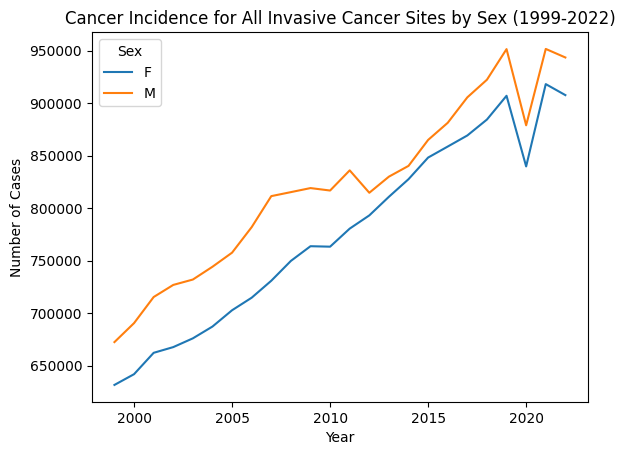

In [58]:
# Filter for all sites data
all_sites_data = cancer[cancer["Cancer Sites"] == "All Invasive Cancer Sites Combined"]
grouped = all_sites_data.groupby(["Year", "Sex"])["Count"].sum()
#print(grouped)

# Convert index back into columns
plot_data = grouped.reset_index()

plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Cancer Incidence for All Invasive Cancer Sites by Sex (1999-2022)")
sns.lineplot(data=plot_data, x="Year", y="Count", hue="Sex")


# 4. Line plots for cancer sites

 Create a line plot for females with x-axis = year, y-axis = incidence of cancer, and a separate line for each cancer site (many lines)

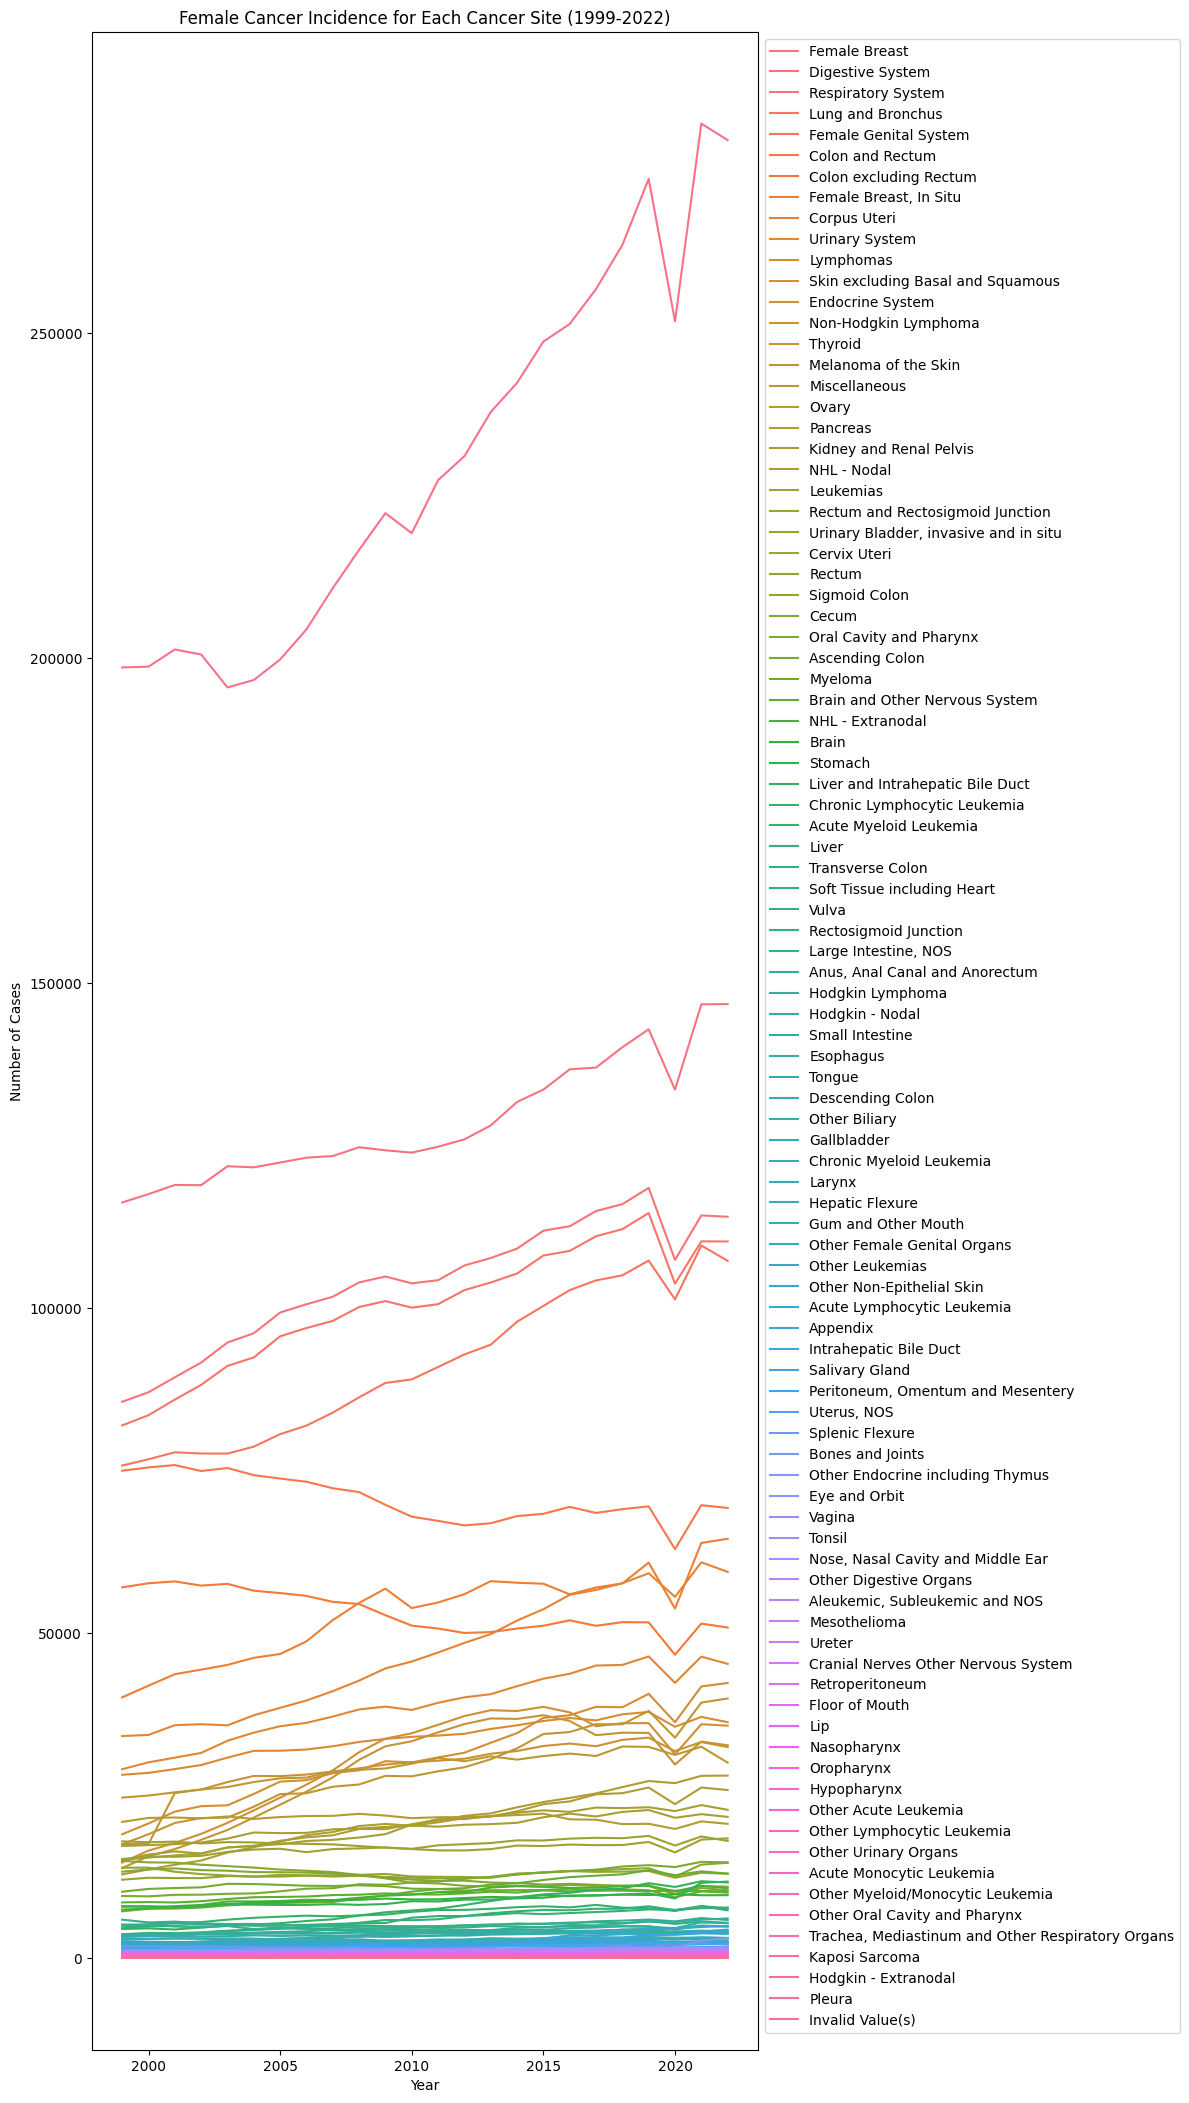

In [59]:
female_data = cancer[cancer["Sex"] == "F"]
female_data_filtered = female_data[
    (female_data["Cancer Sites"] != "All Invasive Cancer Sites Combined") &
    (female_data["Cancer Sites"] != "Male and Female Breast") &
    (female_data["Cancer Sites"] != "Male and Female Breast, In Situ")
]

grouped = female_data_filtered.groupby(["Year", "Cancer Sites"])["Count"].sum()
plot_data = grouped.reset_index()

#Problem: Keepig the legend alphabetical makes matching the colors showin in the legend to the lines difficult (especially near the bottom)
# Solution: Get total count for each cancer site and order our key from highest to lowest incidence count.
site_order = plot_data.groupby("Cancer Sites")["Count"].sum().sort_values(ascending=False).index
plot_data["Cancer Sites"]=pd.Categorical(plot_data["Cancer Sites"], categories=site_order)

# Stretch vertically to seperate lines more
plt.figure(figsize=(12, 23))
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Female Cancer Incidence for Each Cancer Site (1999-2022)")
sns.lineplot(data=plot_data, x="Year", y="Count", hue="Cancer Sites")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# 5. Scatter plot for 2020

Create a scatter plot with a single marker for each (site, sex) pair in 2000, with x-axis = population, y-axis = incidence of cancer cases. Use a different color marker for Males and Females

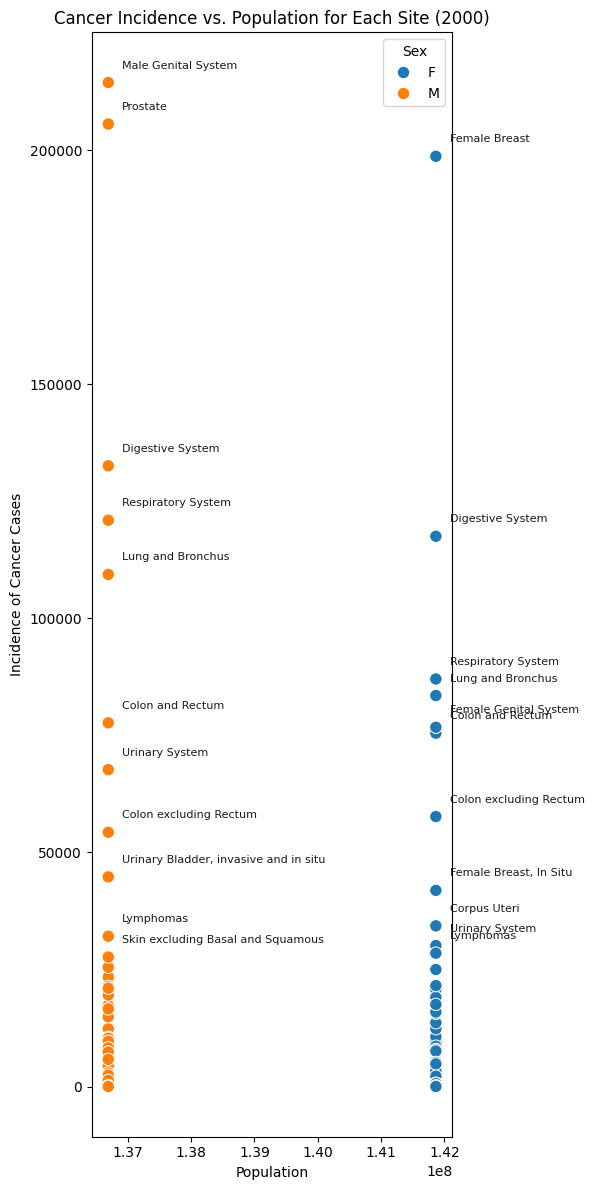

In [64]:
# Filter data for the year 2000 and M/F
data_filtered = cancer[
    (cancer["Cancer Sites"] != "All Invasive Cancer Sites Combined") &
    (cancer["Cancer Sites"] != "Male and Female Breast") &
    (cancer["Cancer Sites"] != "Male and Female Breast, In Situ")
]
data_2000 = data_filtered[data_filtered["Year"] == 2000]

plt.figure(figsize=(6, 12))
sns.scatterplot(data=data_2000, x="Population", y="Count", hue="Sex", s=80)

# I chose to label the top 22 highest incidence points. Everything will overlap near the bottom.
top_10 = data_2000.nlargest(22, 'Count')
for i, row in top_10.iterrows():
    plt.annotate(row['Cancer Sites'], 
                (row['Population'], row['Count']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=8, alpha=0.9)

# Ideally, I would not choose a scatter plot to display this relation of data.
plt.title("Cancer Incidence vs. Population for Each Site (2000)")
plt.xlabel("Population")
plt.ylabel("Incidence of Cancer Cases")
plt.tight_layout()



# 6. Bar plot for each site

Create a bar plot with a bar for each individual cancer site (excluding the all-inclusive case), and bar length based on the incidence of new cases for males in the year 2000

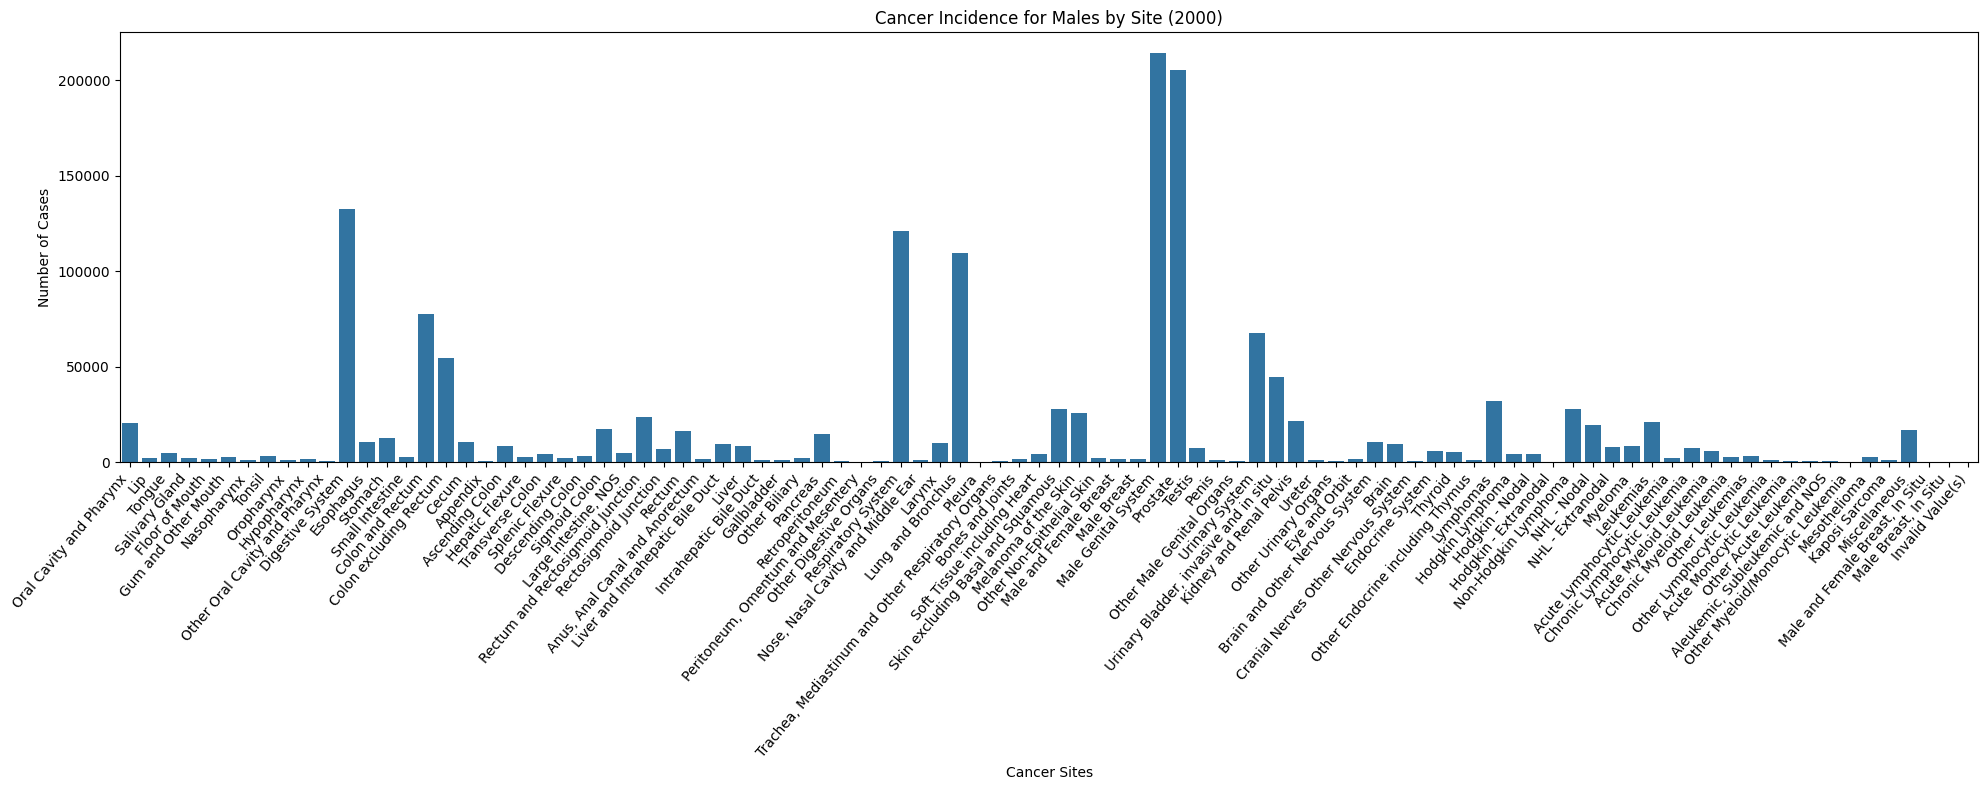

In [61]:
# Filter data for males in 2000, excluding all-inclusive case
male_2000 = cancer[
    (cancer["Year"] == 2000) & 
    (cancer["Sex"] == "M") & 
    (cancer["Cancer Sites"] != "All Invasive Cancer Sites Combined")
]

# Create bar plot
plt.figure(figsize=(20, 8))
sns.barplot(data=male_2000, x="Cancer Sites", y="Count")
plt.xticks(rotation=50, ha='right')
plt.title("Cancer Incidence for Males by Site (2000)")
plt.xlabel("Cancer Sites")
plt.ylabel("Number of Cases")
plt.tight_layout()

# 7. Higher Incidence Between Sexes

For each cancer site and each year, determine whether males or females had the higher incidence

In [62]:
# Group by and sum separately for males and females
male_data = cancer[cancer["Sex"] == "M"].groupby(["Year", "Cancer Sites"])["Count"].sum().reset_index()
female_data = cancer[cancer["Sex"] == "F"].groupby(["Year", "Cancer Sites"])["Count"].sum().reset_index()

# rename columns so they don't conflict when merging
male_data = male_data.rename(columns={"Count": "M"})
female_data = female_data.rename(columns={"Count": "F"})

# merge the two tables on Year and Cancer Sites
merged = pd.merge(male_data, female_data, on=["Year", "Cancer Sites"])

# add a new column for which sex has higher incidence
merged["Higher Incidence"] = ""

# logic for determining if M or F incidences is higher
for i in range(len(merged)):
    if merged.loc[i, "M"] > merged.loc[i, "F"]:
        merged.loc[i, "Higher Incidence"] = "M"
    elif merged.loc[i, "F"] > merged.loc[i, "M"]:
        merged.loc[i, "Higher Incidence"] = "F"
    else:
        merged.loc[i, "Higher Incidence"] = "Equal"

display(merged.head(30))


,Year,Cancer Sites,M,F,Higher Incidence
0,1999,Acute Lymphocytic Leukemia,2188,1652,M
1,1999,Acute Monocytic Leukemia,300,249,M
2,1999,Acute Myeloid Leukemia,5352,4648,M
3,1999,"Aleukemic, Subleukemic and NOS",736,649,M
4,1999,All Invasive Cancer Sites Combined,672530,631741,M
5,1999,"Anus, Anal Canal and Anorectum",1425,2273,F
6,1999,Appendix,641,706,F
7,1999,Ascending Colon,8331,10202,F
8,1999,Bones and Joints,1429,1185,M
9,1999,Brain,9575,7911,M


# 8. Pivot table for cancer / year

Create a pivot table with a row for each cancer site, column for each year, and a value equal to the total incidence of males and females combined

In [63]:
pivot = cancer.pivot_table(
    index='Cancer Sites',
    columns='Year',
    values= 'Count', 
    aggfunc='sum', 
    fill_value=0
)
display(pivot)

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cancer Sites,,,,,,,,,,,,,,,,,,,,,
Acute Lymphocytic Leukemia,3840,4049,4159,4122,4208,4429,4342,4550,4678,4884,...,4872,5091,5396,5416,5403,5705,5585,5545,5434,5439
Acute Monocytic Leukemia,549,590,690,704,767,783,774,767,934,823,...,678,684,698,688,665,673,631,571,548,446
Acute Myeloid Leukemia,10000,10644,10776,10452,10844,10901,10737,11060,11200,11644,...,14955,15521,15344,15706,15742,16405,16971,16604,17135,17266
"Aleukemic, Subleukemic and NOS",1385,1403,1390,1412,1512,1507,1569,1603,1820,1771,...,2379,2336,2427,2127,2235,2367,2313,2368,2446,2248
All Invasive Cancer Sites Combined,1304271,1332566,1377750,1394720,1408190,1431604,1460548,1496800,1542471,1565155,...,1640952,1667957,1713267,1740066,1774849,1806799,1858563,1718755,1869872,1851238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Urinary Bladder, invasive and in situ",59051,60389,60862,62138,63836,65631,66706,65849,67731,68898,...,74645,75838,76475,77151,78207,77801,78932,74953,79510,76529
Urinary System,94493,97794,100484,103705,108290,112325,115844,117595,121451,125054,...,137170,140841,144305,146994,150071,151149,155416,145779,155747,151549
"Uterus, NOS",1173,1236,1244,1276,1313,1246,1297,1266,1293,1445,...,1685,1874,1936,1963,1927,2063,2244,2029,2280,2080
